# Chapter 3 - Exercises

### [Link](https://runestone.academy/runestone/books/published/pythonds3/AlgorithmAnalysis/Exercises.html)

### 1. Devise an experiment to verify that the list index operator is 𝑂(1)

One way to check whether or not the index operator is $O(1)$ is to create different lists with different sizes (in increasing order) and see that the time taken to access an index is independent on the size itself. To achieve so, let us first create an helper function which generates lists of different sizes.

In [42]:
import random

def make_list(n):
    return [random.randint(0, n) for _ in range(n)]

def make_lists_in_magnitude(base, power):
    return [make_list(base ** i) for i in range(1, power + 1)]

Now, we can start the experiment by importing the `time` module, together with `numpy` and `pandas` to do the appropriate data analyses. We are going to define modules which will perform the appropriate sampling and analyses by themselves.

In [43]:
import time 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def average_by_n(base, power):
    lists = make_lists_in_magnitude(base, power)
    averages = []
    
    for ls in lists:
        access_times = []
        
        for i in range(len(ls)):
            s = time.time()
            v = ls[i]
            e = time.time() 
            
            access_times += [e - s]
        
        averages += [np.array(access_times).mean()]

    return np.array(averages)

And now, we can experiment with different `n` and see how speed changes. We can set a rather big step size so that we do not make the experiment long and/or heavy.

[]

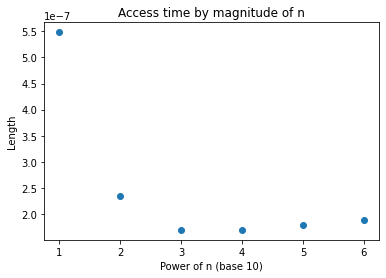

In [44]:
averages = average_by_n(10, 6)

plt.xlabel("Power of n (base 10)")
plt.ylabel("Length")
plt.title("Access time by magnitude of n")
plt.scatter(np.arange(1, len(averages) + 1), averages)
plt.plot()

Even if such an experiment is not fully exhaustive to get conclusions in a real setting, we can easily see how changing the order of magnitude for n, the average access time is not affected. In order to be fully, one can run the previous cell different time and see that:

* There is definitely variance, but it is definitely less than microseconds, and this tells us access time hardly varies.
* In the x axis we have the power to which 10 is raised, and in the y axis we have the time in seconds it took to complete, in average, access to any element in the array by index. We can see that the average access time does not change on average.

### 2. Devise an experiment to verify that get item and set item are 𝑂(1) for dictionaries.

We can proceed in the same way we did for the previous exercise. This time, we have to create specific helper methods to generate dictionaries with an increasing number of keys. For semplicity, we will keep the length of keys variable between some sort of range, as well as the value of those keys.

In [45]:
def make_dict(n, kv_len=10):
    chars = [chr(w) for w in range(ord("A"), ord("z")) if chr(w).isalpha()]
    d = {}

    for _ in range(n):
        k = "".join(random.choices(chars, k=kv_len))
        while k in d:
            k = "".join(random.choices(chars, k=kv_len))
        v = "".join(random.choices(chars, k=kv_len))
        d[k] = v
    
    return d

def make_dicts_to_magnitude(base, power, kv_len=10):
    return [make_dict(base ** i, kv_len=kv_len) for i in range(1, power + 1)]

print(len(make_dict(2)))


2


Now we can proceed to create a method to get a vector of averages.

In [46]:
def average_by_n_dict(base, power, kv_len=10):
    dicts = make_dicts_to_magnitude(base, power, kv_len=kv_len)
    averages_get = []
    averages_set = []
    
    for d in dicts:
        access_times_get = []
        access_times_set = []
        
        for k in d.keys():
            s = time.time()
            v = d[k]
            e = time.time() 
            
            access_times_get += [e - s]

            s = time.time()
            d[k] = v + " "
            e = time.time() 

            access_times_set += [e - s]
        
        averages_get += [np.array(access_times_get).mean()]
        averages_set += [np.array(access_times_set).mean()]

    return np.array(averages_get), np.array(averages_set)
    

Let's now get the averages using dictionaries ranging from 10 to a million (of course, we are just picking six of them, representing the different magnitudes).

__Warning!__
Depending on the input values, the function may take a while to compute!

In [47]:
averages_get, averages_set = average_by_n_dict(10, 6)

Let's now see how the two dictionary operations performed!

[]

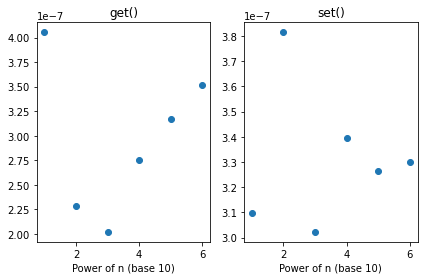

In [48]:
plt.subplot(1, 2, 1)
plt.title("get()")
plt.xlabel("Power of n (base 10)")
plt.scatter(np.arange(1, len(averages_get) + 1), averages_get)
plt.subplot(1, 2, 2)
plt.title("set()")
plt.xlabel("Power of n (base 10)")
plt.scatter(np.arange(1, len(averages_set) + 1), averages_set)

plt.tight_layout()

plt.plot()


Even here, we can see how the time is distributed within a standard deviation which is less than a microsecond, no matter the size. We infer from this fact, `get()` and `set()` take constant time to finish.

### 3. Devise an experiment that compares the performance of the `del` operator on lists and dictionaries.

To test this, what I am going to do is to create two routines which give us the appropriate vectors of averages used to see the performances. To do so, I want to create a function sample, which sample a deletion time from a list and a dictionary, so that we can build up

In [49]:
def sample_time_del_list(n):
    l = [0] * n
    i = random.randint(0, n - 1)
    s = time.time()
    del l[i]
    e = time.time()

    return e - s

def sample_time_del_dict(n):
    d = {str(i): i for i in range(n)}
    i = str(random.randint(0, n - 1))
    s = time.time()
    del d[i]
    e = time.time()

    return e - s

def average_sample_n_times(n_elements, n_times, sampling_function):
    return np.array([sampling_function(n_elements) for _ in range(n_times)]).mean()

def make_statistics_vector(base, power, sample_size, sampling_method):
    return np.array([average_sample_n_times(base ** i, sample_size, sampling_method) for i in range(1, power + 1)])

def make_statistics_vector_in_range(begin, end, step, sample_size, sampling_method):
    return np.array([average_sample_n_times(i, sample_size, sampling_method) for i in range(begin, end + 1, step)])
    

Now let's proceed with the creation of the two vectors of statistics. We can use the previously defined methods. We can proceed by creating a vector of operation times, where the input_size `n` varies by order of magnitude (defined as powers of 10).

In [56]:
del_stats_list = make_statistics_vector_in_range(1, 1000000, 50000, 16, sample_time_del_list)
del_stats_dict = make_statistics_vector_in_range(1, 1000000, 50000, 16, sample_time_del_dict)

Let's plot the resulting vectors. Remember that they contain the average (on 8 samples in this case) of the operation time for `del`. The more precise we want to be, the more samples we need to consider.

[]

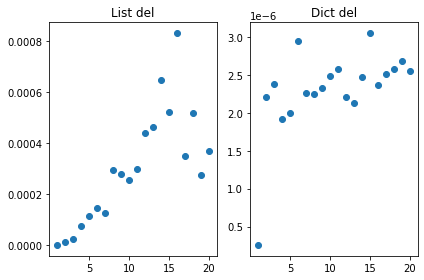

In [58]:
plt.subplot(1, 2, 1)
plt.title("List del")
plt.scatter(np.arange(1, len(del_stats_list) + 1), del_stats_list)
plt.subplot(1, 2, 2)
plt.title("Dict del")
plt.scatter(np.arange(1, len(del_stats_dict) + 1), del_stats_dict)

plt.tight_layout()

plt.plot()

__Note__: we can definitely see a trend in the list operation. In particular, it seems that time required increases with size. For the dictionary, we can see a different thing: at times it seems constant while at other times, we also see a linear trend. 

### 4. Given a list of numbers in random order, write an algorithm that works in 𝑂(𝑛log(𝑛)) to find the kth smallest number in the list.

A basic solution, knowing that the `.sort()` method works in $O(nlog(n))$ and indexing works in constant time, is to just sort the list and return the k-th element. 

In [ ]:
def kth_smallest(ls, k):
    try:
        a = sorted(ls)[k]
    except IndexError:
        print("Error! Returning the biggest (least small).")
        a = sorted(ls)[-1]

    return a


### 5. Can you improve the algorithm from the previous problem to be linear? Explain.

The alternative here uses a fixed number of iterations (less than $n$) over the array, and builds up an array of size $m$ where $m = max(array)$, to store the values of the first array, is such a way that:
`new_array[n + offset] = n if n in array, else sentinel`. Sentinel is a value that is set to `max + 1` for commodity. The value offset helps us accomodate non negative values in their appropriate position. Once the filling process is completed, we remove all the sentinel values. This is quite not a linear solution, but rather $O(n + k)$, where $k$ is the size of the second array.

In [ ]:
def kth_smallest_linear(ls, k):
    biggest = max(ls)
    smallest = min(ls)

    offset = abs(smallest) if smallest < 0 else 0

    sentinel = biggest + 1
    counting_arr = [sentinel] * biggest

    for n in ls:
        counting_arr[n + offset] = n 

    while sentinel in counting_arr:
        counting_arr.remove(sentinel)

    try:
        a = counting_arr[k]
    except IndexError:
        print("Error! Returning the biggest (least small).")
        a = counting_arr[-1]

    return a
